## `19IT031 Aman Desai`

## Practical - 10 `CNN for Image Classification`

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training
batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain
exactly 5000 images from each class.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 780s 5us/step


(50000, 32, 32, 3)

In [3]:
y_train[:3] # y_train is a 2D array, for our classification having 1D array is good. so i will convert this to 1D array

array([[6],
       [9],
       [9]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)
y_test[:3]

array([3, 8, 8], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
# Plotting of the Image
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

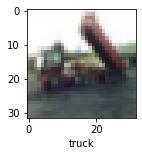

In [8]:
plot_sample(X_train, y_train, 2)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 48ms/step - loss: 1.8101 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6224 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5412 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 77s 50ms/step - loss: 1.4804 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4326 - accuracy: 0.4955


In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.66      0.56      1000
           1       0.55      0.69      0.61      1000
           2       0.36      0.39      0.37      1000
           3       0.43      0.23      0.30      1000
           4       0.35      0.51      0.41      1000
           5       0.54      0.25      0.34      1000
           6       0.58      0.43      0.49      1000
           7       0.49      0.64      0.55      1000
           8       0.56      0.63      0.59      1000
           9       0.64      0.41      0.50      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [12]:
# Now build a convolutional neural network to train images
cnn = models.Sequential([
layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 46s 25ms/step - loss: 1.4560 - accuracy: 0.4786
Epoch 2/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0906 - accuracy: 0.6187
Epoch 3/15
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9568 - accuracy: 0.6703
Epoch 4/15
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8694 - accuracy: 0.6991
Epoch 5/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8006 - accuracy: 0.7251
Epoch 6/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7443 - accuracy: 0.7432
Epoch 7/15
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6901 - accuracy: 0.7589
Epoch 8/15
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6407 - accuracy: 0.7778
Epoch 9/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.5928 - accuracy: 0.7938
Epoch 10/15
1563/1563 [==============================] - 40s 26m

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1767 - accuracy: 0.6915


[1.1766937971115112, 0.6915000081062317]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.9789830e-07, 2.6758245e-11, 2.1648362e-05, 9.7669971e-01,
        3.3283814e-05, 2.2921404e-02, 3.1996510e-04, 1.6998590e-07,
        3.4983793e-06, 3.1896269e-10],
       [2.1361439e-03, 6.8034708e-02, 3.9264805e-06, 2.3136847e-08,
        5.5136194e-11, 1.7254802e-10, 5.5093301e-11, 1.9256474e-13,
        9.2978454e-01, 4.0629504e-05],
       [4.3061096e-02, 9.0831727e-01, 4.2352569e-03, 6.3392770e-04,
        9.2706017e-05, 7.1744071e-06, 1.3651362e-03, 3.2121636e-04,
        4.1565415e-02, 4.0077063e-04],
       [6.5047133e-01, 3.9986926e-06, 6.7519367e-04, 2.5228714e-05,
        8.8510162e-05, 4.2378825e-09, 1.5827524e-07, 1.0194930e-08,
        3.4873566e-01, 1.6465673e-08],
       [4.0941969e-11, 9.4705861e-09, 1.4169747e-05, 1.7547101e-03,
        9.3893272e-01, 1.4031496e-05, 5.9284393e-02, 1.7014904e-09,
        1.1386865e-10, 6.8976505e-11]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

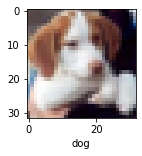

In [22]:
plot_sample(X_test, y_test,16)

In [23]:
classes[y_classes[16]]

'dog'

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      1000
           1       0.75      0.87      0.81      1000
           2       0.57      0.61      0.59      1000
           3       0.52      0.49      0.50      1000
           4       0.66      0.59      0.62      1000
           5       0.57      0.65      0.61      1000
           6       0.78      0.76      0.77      1000
           7       0.83      0.69      0.75      1000
           8       0.81      0.80      0.80      1000
           9       0.85      0.65      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



## Conclusion:

By performing this practical i learned about convolution neural network, it is used for image classification also learned about Convolution, Relu and Pooling method and based on these classify the image of
CIFAR-10 Dataset.